In [28]:
# import packages and plotting scripts

import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr
import datetime 
import warnings

os.chdir(  "/Users/etmu9498/Desktop/research/scripts")
import make_plots

In [2]:
# load dropsonde data

sonde_path_0926 = "/Users/etmu9498/Desktop/research/dropsondes/20210926H1_NETCDF"
sonde_path_0929 = "/Users/etmu9498/Desktop/research/dropsondes/20210929H2_NETCDF"

file_names_0926 = []
for (dirpath, dirnames, file) in os.walk( sonde_path_0926):
    file_names_0926.extend(file)
    break

# for number in range( len( file_names_0926)):
  #   print( str( number) + ") " + file_names_0926[ number])
    
print("\n\n")


file_names_0929 = []
for (dirpath, dirnames, file) in os.walk( sonde_path_0929):
    file_names_0929.extend(file)
    break

# for number in range( len( file_names_0929)):
  #   print( str( number) + ") " + file_names_0929[ number])


In [52]:
# exploring data

# path = "/Users/etmu9498/Desktop/research/dropsondes/20210926H1_NETCDF"
# file = "D20210926_223514QCQC.nc"
os.chdir( sonde_path_0926)
sonde1 = xr.open_dataset( file_names_0926[0])

# print("time: " + str(  sonde1.time.values))
# print("len time: " + str( len( sonde1.time.values)))
# print("max time: " + str(  np.nanmax( sonde1.time.values)))
# print("min time: " + str(  np.nanmin( sonde1.time.values)) + "\n\n")


# print("lat: " + str(  sonde1.lat.values))
# print("len lat: " + str( len( sonde1.lat.values)))
# print("max lat: " + str(  np.max( sonde1.lat.values)))
# print("min lat: " + str(  np.min( sonde1.lat.values)) + "\n\n")

# print("lon: " + str(  sonde1.lon.values))
# print("len lon: " + str( len( sonde1.lon.values)))
# print("max lon: " + str(  np.nanmax( sonde1.lon.values)))
# print("min lon: " + str(  np.nanmin( sonde1.lon.values)) + "\n\n")

# print("rh: " + str(  sonde1.rh.values))
# print("len rh: " + str( len( sonde1.rh.values)))
# print("max rh: " + str(  np.nanmax( sonde1.rh.values)))
# print("min rh: " + str(  np.nanmin( sonde1.rh.values)) + "\n\n")

# print("height: " + str(  sonde1.gpsalt.values))
# print("len height: " + str( len( sonde1.gpsalt.values)))
# print("max height: " + str(  np.nanmax( sonde1.gpsalt.values)))
# print("min height: " + str(  np.nanmin( sonde1.gpsalt.values)) + "\n\n")

print( len( sonde1.tdry.values))
print( len( sonde1.tdry.values[~np.isnan( sonde1.tdry.values)]))

print( np.nanmax( sonde1.tdry.values))
print( np.nanmin( sonde1.tdry.values))

sonde1


1056
514
24.61
15.33


<xarray.Dataset>
Dimensions:         (time: 1056, obs: 1)
Coordinates:
  * time            (time) datetime64[ns] 2021-09-26T22:39:38.040008544 ... 2...
    lat             (time) float32 ...
    lon             (time) float32 ...
    gpsalt          (time) float32 ...
Dimensions without coordinates: obs
Data variables: (12/27)
    trajectory      |S1 ...
    launch_time     datetime64[ns] ...
    pres            (time) float32 ...
    tdry            (time) float32 24.61 24.61 nan 24.54 nan ... nan nan nan nan
    dp              (time) float32 ...
    rh              (time) float32 ...
    ...              ...
    reference_rh    (obs) float32 ...
    reference_wspd  (obs) float32 ...
    reference_wdir  (obs) float32 ...
    reference_lat   (obs) float32 ...
    reference_lon   (obs) float32 ...
    reference_alt   (obs) float32 ...
Attributes: (12/16)
    Conventions:          CF-1.6
    RepoRevision:         V3.4.6
    RepoLastChangedDate:  Fri Apr 30 16:17:27 2021 -0600
    RepoId:               163b1128fa837a96c93dfe8a59c915ff3185b748
    RepoBranch:           master
    featureType:          trajectory
    ...                   ...
    PlatformType:         P-3
    ProcessingTime:       02 Feb 2022 22:57 UTC
    Project:              
    QCDisclaimer:         
    SondeId:              203240785
    SoundingDescription:  D20210926_223514QC.frd P-3, NOAA42

In [4]:
# load crl data

crl_path = "/Users/etmu9498/Desktop/research/CRL_data/2021"

file_names = []
for (dirpath, dirnames, file) in os.walk( crl_path):
    file_names.extend(file)
    break

# for number in range( len( file_names)):
  #   print( str( number) + ") " + file_names[ number])

In [8]:
# testing datetime things

# time = sonde1.time[0].values.time()

print( len( sonde1.time.values))

start_time = np.datetime64( sonde1.time[0].values)
print( start_time)

end_time = np.datetime64( sonde1.time[-1].values)
print (end_time)

# time2 = np.datetime64( sonde1.time[0].values).astype("float")
# print( time2)

time3 = sonde1.time[0].values.astype(str)[11:22]
float_time3 = float( time3[0:2]) + float( time3[3:5]) / 60 + float( time3[6:8]) / 3600
print( time3)
print( float_time3)

1056
2021-09-26T22:39:38.040008544
2021-09-26T22:35:14.000000000
22:39:38.04
22.660555555555554


C:\Users\etmu9498\Desktop\research\scripts\make_plots.py:309: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( xaxis, - crl_data.H, crl_rh)


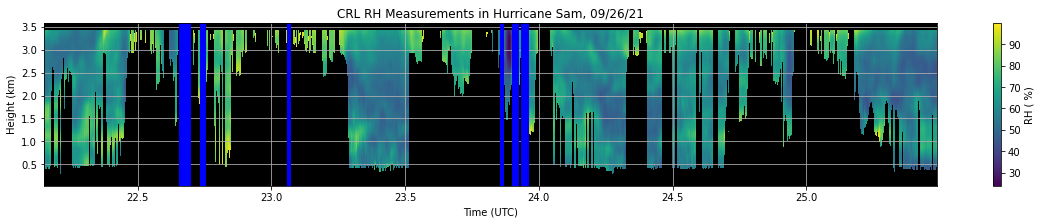

In [42]:
# plot wher rh profiles are for comparisons: whole tc

fig = plt.figure( figsize=(20, 3))
make_plots.plot_rh( crl_path, file_names[16], 0, 6000, 'time')
plt.title( "CRL RH Measurements in Hurricane Sam, 09/26/21")

# plot all dropsonde locations to get a sense of where they are!
os.chdir( sonde_path_0926)
for ind in range( 13):
    sonde = xr.open_dataset( file_names_0926[ ind])   
    # look at the initial time for each sonde
    # do some horrible conversions to get result into a float, there's probably a better solution
    string_time = sonde.time[0].values.astype(str)[11:22]
    float_time = float( string_time[0:2]) + float( string_time[3:5]) / 60 + float( string_time[6:8]) / 3600
    plt.axvline(x=float_time, color='b', linewidth=4)
    # print( file_names_0926[ ind])

C:\Users\etmu9498\Desktop\research\scripts\make_plots.py:309: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( xaxis, - crl_data.H, crl_rh)


(23.5, 24.1)

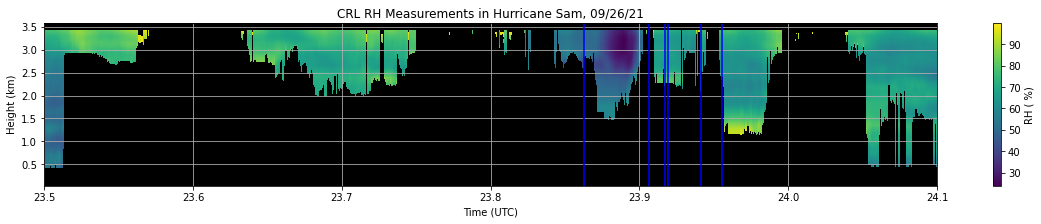

In [43]:
# same thing but zoomed in on a specific eye
fig = plt.figure( figsize=(20, 3))
make_plots.plot_rh( crl_path, file_names[16], 0, 6000, 'time')
plt.title( "CRL RH Measurements in Hurricane Sam, 09/26/21")

# plot all dropsonde locations to get a sense of where they are!
os.chdir( sonde_path_0926)
for ind in range( 13):
    sonde = xr.open_dataset( file_names_0926[ ind])   
    # look at the initial time for each sonde
    # do some horrible conversions to get result into a float, there's probably a better solution
    string_time = sonde.time[0].values.astype(str)[11:22]
    float_time = float( string_time[0:2]) + float( string_time[3:5]) / 60 + float( string_time[6:8]) / 3600
    plt.axvline(x=float_time, color='b', linewidth=1.5)

# eye 1
# plt.xlim( [22.3, 23.3])
# eye 2
plt.xlim( [23.5, 24.1])

start 22.660555555555554 end 22.58722222222222 mid 22.623888888888885
start 22.664166666666667 end 22.59861111111111 mid 22.63138888888889
start 22.67777777777778 end 22.610000000000003 mid 22.643888888888892
start 22.69 end 22.625555555555557 mid 22.65777777777778
start 22.742222222222225 end 22.654444444444444 mid 22.698333333333334
start 22.746944444444445 end 22.656666666666666 mid 22.701805555555556
start 23.064444444444444 end 22.99138888888889 mid 23.027916666666666
start 23.8625 end 23.78888888888889 mid 23.825694444444444
start 23.906666666666666 end 23.830277777777777 mid 23.868472222222223
start 23.91722222222222 end 23.834166666666665 mid 23.87569444444444
start 23.91916666666667 end 23.852222222222224 mid 23.885694444444447
start 23.941388888888888 end 23.878611111111113 mid 23.91
start 23.95583333333333 end 23.890277777777776 mid 23.923055555555553


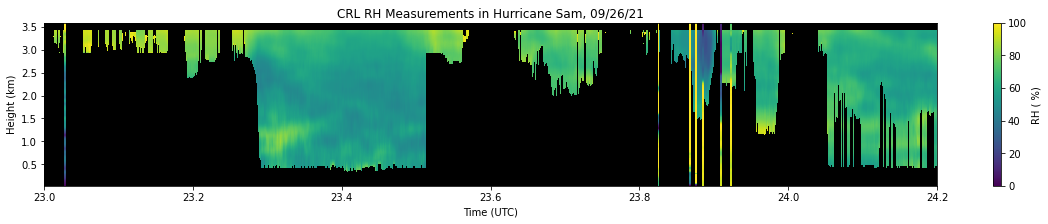

In [48]:
# trying to plot vertical cross sections of rh

warnings.filterwarnings("ignore")

fig = plt.figure( figsize=(20, 3))
make_plots.plot_rh( crl_path, file_names[16], 0, 6000, 'time')
plt.clim(0, 100) 
plt.title( "CRL RH Measurements in Hurricane Sam, 09/26/21")

# make a new height array for the rh measurements
os.chdir( crl_path)
crl_data = xr.open_dataset( file_names[16])

# plot all dropsonde locations to get a sense of where they are!
os.chdir( sonde_path_0926)

# for eye 1
# plt.xlim( [22.3, 23.3])
# for eye 2
plt.xlim( [23.0, 24.2])


for ind in range( 13):
    sonde = xr.open_dataset( file_names_0926[ ind])   
    # look at the initial time for each sonde
    # do some horrible conversions to get result into a float, there's probably a better solution
    start_string_time = sonde.time[0].values.astype(str)[11:22]
    start_time = float( start_string_time[0:2]) + float( start_string_time[3:5]) / 60 + float( start_string_time[6:8]) / 3600
    
    end_string_time = sonde.time[-1].values.astype(str)[11:22]
    end_time = float( end_string_time[0:2]) + float( end_string_time[3:5]) / 60 + float( end_string_time[6:8]) / 3600
    
    mid_time = ( start_time + end_time ) / 2
    
    current_rh = sonde.rh.values[~np.isnan( sonde.rh.values)]
    heights = np.linspace( np.nanmin( -crl_data.H.values), np.nanmax( -crl_data.H.values), len( current_rh))

    plt.pcolormesh( [mid_time - .00125, mid_time + .00125], heights, np.matrix( [current_rh, current_rh] ).transpose() ) # .0025
    print( "start " + str(start_time) + " end " + str(end_time) + " mid " + str(mid_time))
   # times.append( float_time)
    #print( len ( [float_time]))
    #print( len( heights))
    #print( len( sonde.rh.values))
    
# plt.colorbar(label="RH ( %)")
plt.clim(0, 100) 
ax = plt.gca()
ax.set_facecolor('k')

warnings.filterwarnings("default")


start 22.660555555555554 end 22.58722222222222 mid 22.623888888888885
start 22.664166666666667 end 22.59861111111111 mid 22.63138888888889
start 22.67777777777778 end 22.610000000000003 mid 22.643888888888892
start 22.69 end 22.625555555555557 mid 22.65777777777778
start 22.742222222222225 end 22.654444444444444 mid 22.698333333333334
start 22.746944444444445 end 22.656666666666666 mid 22.701805555555556
start 23.064444444444444 end 22.99138888888889 mid 23.027916666666666
start 23.8625 end 23.78888888888889 mid 23.825694444444444
start 23.906666666666666 end 23.830277777777777 mid 23.868472222222223
start 23.91722222222222 end 23.834166666666665 mid 23.87569444444444
start 23.91916666666667 end 23.852222222222224 mid 23.885694444444447
start 23.941388888888888 end 23.878611111111113 mid 23.91
start 23.95583333333333 end 23.890277777777776 mid 23.923055555555553


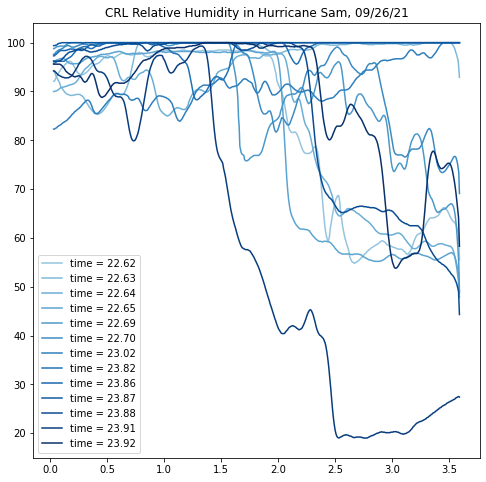

In [47]:
# print rh vs height for different sondes

warnings.filterwarnings("ignore")

# set up plot
fig = plt.figure( figsize=(8, 8))
plt.title( "CRL Relative Humidity in Hurricane Sam, 09/26/21")
# choose color gradient!

# evenly_spaced_interval = np.linspace(0, 1, 13)
colors = plt.cm.Blues( np.linspace(.4,1,13)) # [plt.cm.rainbow( x) for x in evenly_spaced_interval]

# ["k", "b", "k", "b", "k", "b", "k", "b", "k", "b", "k", "b", "k"]

# make a new height array for the rh measurements
os.chdir( crl_path)
crl_data = xr.open_dataset( file_names[16])

# plot all dropsonde locations to get a sense of where they are!
os.chdir( sonde_path_0926)

# Plot each dropsonde profile
for ind in range( 13):
    sonde = xr.open_dataset( file_names_0926[ ind])
    
    # look at the initial time for each sonde
    # do some horrible conversions to get result into a float, there's probably a better solution
    start_string_time = sonde.time[0].values.astype(str)[11:22]
    start_time = float( start_string_time[0:2]) + float( start_string_time[3:5]) / 60 + float( start_string_time[6:8]) / 3600
    
    end_string_time = sonde.time[-1].values.astype(str)[11:22]
    end_time = float( end_string_time[0:2]) + float( end_string_time[3:5]) / 60 + float( end_string_time[6:8]) / 3600
    
    mid_time = ( start_time + end_time ) / 2
    
    # get rid of nans in rh dataset... might cause issues when syncing to time?
    current_rh = sonde.rh.values[~np.isnan( sonde.rh.values)]
    heights = np.linspace( np.nanmin( -crl_data.H.values), np.nanmax( -crl_data.H.values), len( current_rh))

    labels = "time = " + str( mid_time)[0:5]
    
    plt.plot( heights, current_rh, label=labels, color = colors[ ind] ) 
    print( "start " + str(start_time) + " end " + str(end_time) + " mid " + str(mid_time))
    
plt.legend()

warnings.filterwarnings("default")
